Python Machine Learning wydanie 3 - epsko umcs - epsko academy collectiion. Rodział 2 i sztuczne neurony.

https://github.com/rasbt/python-machine-learning-book-3rd-edition



Zadaniem będzie zbudowanie modelu klasyfikacyjnego, którego zadaniem będzie określenie rodzaju irysu na podstawie 4 parametrów: długość i szerokość płatka i sepalu.
Impulsy przyjmowane przez perceptron są sumowane w dziedzinie czasu. Aż przekroczy próg zwany progiem aktywacji, to się aktywuje i sygnał się aktywuje i przekazuje informacje dalej do kolejnych neuronów.

Siła połączeń odpowiada wagom połączenia synaptycznego. Próg aktywacji to thetha. Jeśli suma ważona jest wyższa niż thetha to na wyjsciu pojawia się jedynka, a jak mniejsza to zero.
Z - suma ważona wejść
W0 = próg aktywacji z przeciwnym znakiem - często nazywany biasem.

Neuron uczy się w taki sposób, że na wejscie neuronu podajemy przykład uczący - taki z 4 wejściami. Sprawdziamy czy na wyjściu jest 1 czy -1, jak jest 1, to nic nie zmieniamy, jak jest -1 to zmieniamy wagi.
I wtedy mija jedna epoka. Trzeba przez wiele epok uczyć neuron, żeby dla starszych danych nie pojawiały się różnice w starszych przypadkach

Uczenie neuronu:
- Inicjalizujemy wagi małymi losowymi wartościami
- Robimy dwie klasy -1 lub +1
- Porównujemy wartość z oczekiwaną wartością

X - tyle wierszy ile jest przypadków uczących
y - tyle kolumnt ile cech

Wagi są losowane z rozkładu normalnego. Liczba wag to jest X.Shape[1] - krotka ile jest wierszy i kolumn naszego przypadku + 1

Zmienna `update` - błąd uczenia * krok uczenia
To jest właśnie z tego wzoru wszystko

Jeśli update będzie inny niż 0, to znaczy że neuron się pomylił i wtedy sumujemy błędy. Do listy błędów dopisywana jest suma błędów dla każdej epoki

`predict` to nawias klamrowy, jest to po prostu ternary operator. Różni się to tylko tym, że robimy to dla każdego elementów naszego wektora. Bierze wektor i sprawdza czy na danym miejscu jest true czy false i w tym miejscu zwraca 1 lub -1

`net_input` dla każdego wiersza macierzy X mnoży przez wagę i potem dodaje bias. Zwróci wektor z dla wszystkich przypadków uczących

In [37]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib

In [38]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors, N=len(np.unique(y)))

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

In [39]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [40]:
df = pd.read_csv('iris.data', header=None, encoding='utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
#select setosa and versicolor
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

In [49]:
#extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

In [43]:
X.shape, y.shape

((100, 2), (100,))

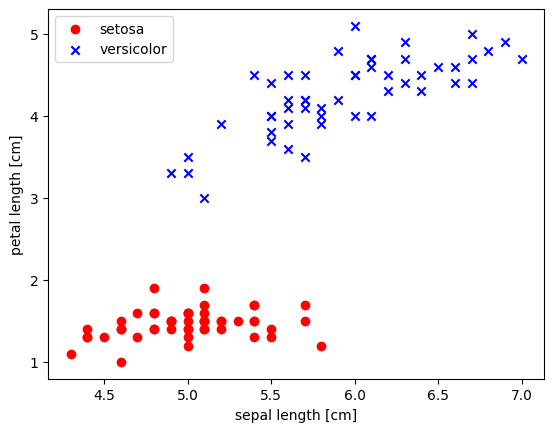

In [50]:
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left');

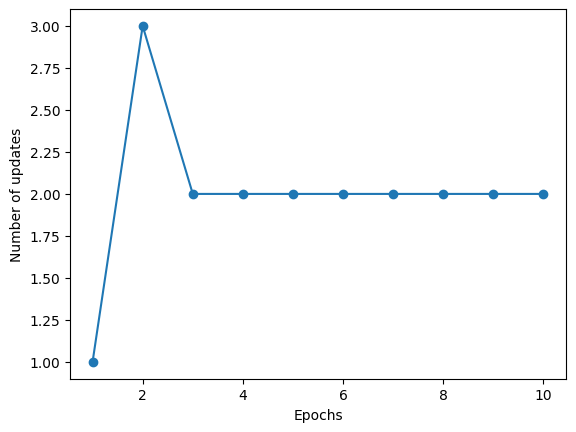

In [45]:
ppn = Perceptron(eta=0.1, n_iter=10, random_state=1)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates'); #czyli de facto liczba błędów

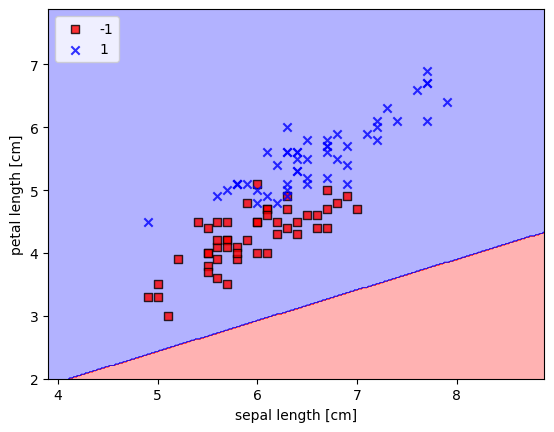

In [46]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

Zrobić to samo, ale dla ostatnich 100 przypadków

Widrow-Hoff - błąd jest komulowany i modyfikacja wag jest robiona raz na epokę.

Na wyjściu jest to co na wejściu - funkcja aktywacji. Różnica jest między wyjściem funkcji aktywacji, a etykietą.

Gradient - wektor wskazujący kierunek najszybszego wzrostu funkcji.
Z - net input - suma ważona wejść
Funkcja aktywacji w WH jest funkcją liniową - nic się nie zmienia
update(i) oczekiwana wartość

AdalineGD - gradient descent
- po każdej epoce liczymy element funkcji kosztu
- funkcja aktywacji - funkcja fi(Z) - nic nie robi, dostaje Z i zwraca Z
- funkcja predict - wylicza dla X wyjście czyli fi(x), dla wszystkich przypadków uczących sprawdzamy czy jest aktywowany i zwracamy 1 lub -1
-net input - iloczyn skalarny, suma po wszystkich j dla każdego i
i to numer obserwacji
j to numer zmiennej

Brany jest wektor j z każdej obserwacji i i mnożony przez odpowiadający mu wketor wag

-fit

In [47]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute linear activation"""
        return z

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

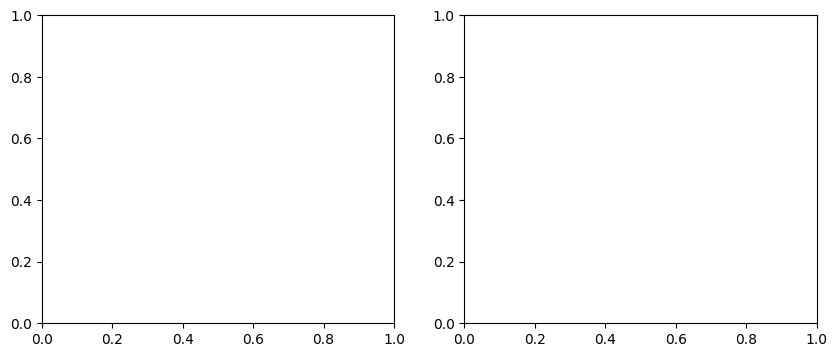

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

In [52]:
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01');

In [53]:
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001');

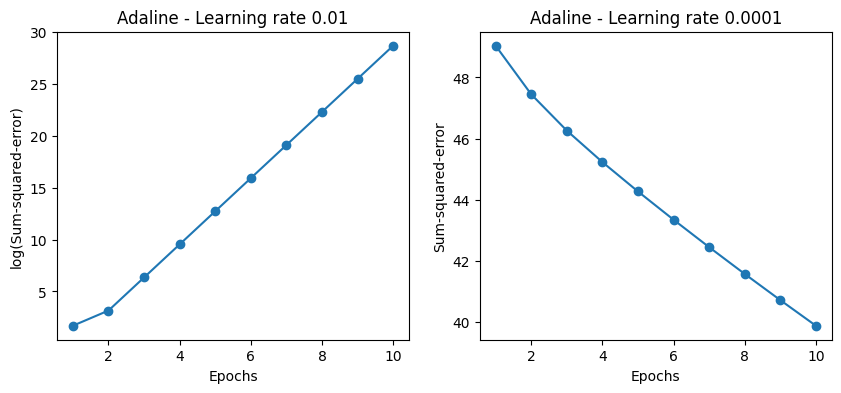

In [54]:
fig

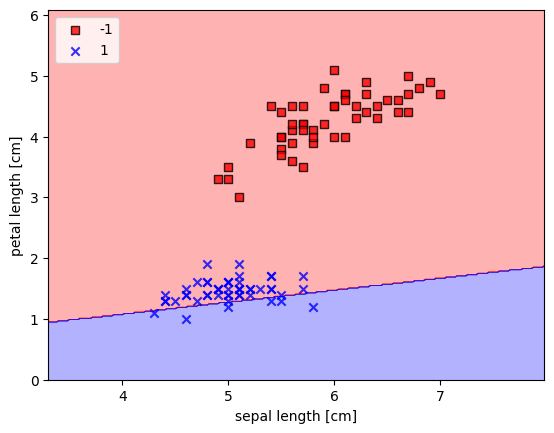

In [55]:
plot_decision_regions(X, y, classifier=ada2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

Problem w tym, że sumy błędów stają się duże. Dlatego trzeba wszystkie zmienne przeskalować do tego samego rzędu wartości. Można to zrobić na 2 sposoby - standaryzacja - liczymy dla każdej kolumny średnią i odchylenie standardowe. Dla każdej zmiennej odejmujemy średnią i dzielimy przez odchylenie standardowe.
Jest też opcja normalizacji, ale to jest słabe jak jakieś zmienne mają duże odchylenie.[

In [56]:
X_std = np.empty(X.shape)
X_std = (X - X.mean(axis=0)) / X.std(axis=0) #element po elemencie odejmuję średnią i dzielę przez odchylenie standardowe
print(X_std.mean(0))
print(X_std.std(0))

[-1.51822999e-15 -3.86357613e-16]
[1. 1.]


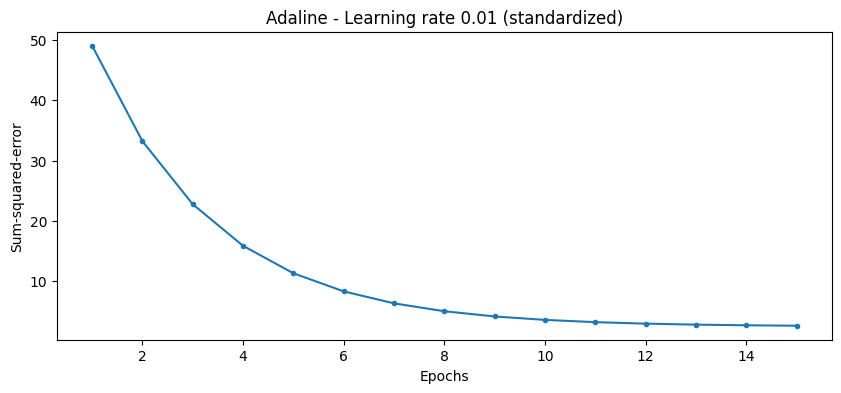

In [59]:
fig = plt.figure(figsize=(10, 4))
ada_gd = AdalineGD(n_iter=15, eta=0.01).fit(X_std, y)
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.01 (standardized)');



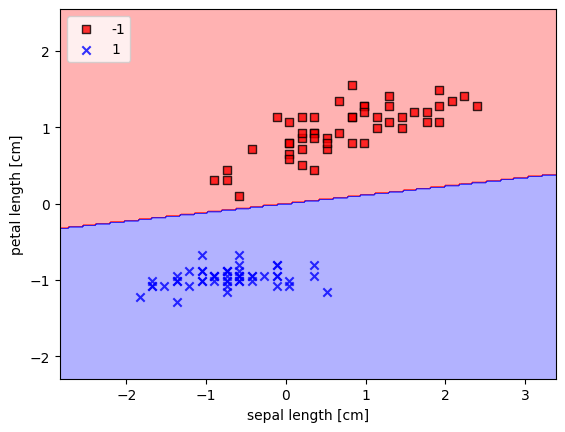

In [60]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left');

Zmieniając zmienne, zmienić dla ostatnich 50 i wybrać inne warunki porównywania, bo jest ograniczone teraz dla petal i sepal lenght. Mozna sprawdzić dla 4 zmiennych czy to jakoś pomaga, ale to nie da się zwizualizować wtedy